# Tech Challenge - Fase 1

Objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações.

## Passo a Passo
1. Coletar e organizar os dados de exportação de vinhos;
2. Analisar os dados (Países que mais importam vinhos do Brasil, Quantidade, Ano com maior número de exportação, etc)
3. Adicionar contexto com dados externos (Clima, demografia, Economia, etc)
4. Construir as visualizações (Power BI ou outra ferramenta que o Grupo Sugerir)
5. Conclusão (Formular um texto com a conclusão da análise, por exemplo, Países com maior oportunidade de crescimento de exportação, ações de melhoria, etc)

## Impacto do PIB na Exportação

### Exportação

In [ ]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Carregamento dos dados
#Fonte: Vinícola Parceira - Aba Exportação (http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06)

VinhoMesa = pd.read_csv('/content/ExpVinho(2).csv', sep='\t', encoding='utf-8')

In [ ]:
# Criar o Dataframe e expor as primeiras linhas
df_VinhoMesa = pd.DataFrame(VinhoMesa)
df_VinhoMesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Exclusão dos anos que não serão analisados
df_VinhoMesa = df_VinhoMesa.drop(df_VinhoMesa.columns[2:82], axis=1)
df_VinhoMesa.head()

,Id,País,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,33557,189891,13889,69001,2833,8861,1573,9300,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Verificar as colunas que contém .1, pois são as colunas referente ao valor em USD
df_VinhoMesa.columns[df_VinhoMesa.columns.str.contains(r'\.1')]

Index(['2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1',
       '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1',
       '2024.1'],
      dtype='object')

In [ ]:
#Separando as colunas de Litros e Valor
# Colunas de quantidade: Percorrer a tabela e adicinar a lista as colunas que contém apenas digitos (sem .)
coluna_litros = [col for col in df_VinhoMesa.columns if col.isdigit()]

# Colunas de valor USD: Percorrer a tabela e adicionar a lista apenas as colunas que contém .1
coluna_Valor = [col for col in df_VinhoMesa.columns if '.1' in col]

In [ ]:
#Separar a tabela(DataFrames) em valor e quantidade(litros)
# Dados de quantidade (litros)
df_litros = df_VinhoMesa[['Id', 'País'] + coluna_litros]

# Dados de valor
df_valor = df_VinhoMesa[['Id', 'País'] + coluna_Valor]

In [ ]:
#Renomear a coluna ano para tirar o .1
df_valor.columns = ['Id', 'País'] + [col.replace('.1', '') for col in coluna_Valor]

In [ ]:
#Usar o método melt() para transforma a coluna de ano em linhas
# Transformando quantidade
df_quantidade_linhas = df_litros.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Quantidade(L)')

# Transformando valor
df_valor_linhas = df_valor.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Valor(USD)')

In [ ]:
#Usar o método melt() para transforma a coluna de ano em linhas
# Transformando quantidade
df_quantidade_linhas = df_litros.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Quantidade(L)')

# Transformando valor
df_valor_linhas = df_valor.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Valor(USD)')

In [ ]:
#Juntar as duas tabelas(DataFrame) usando o merge()
exportacao_anual_Pais = pd.merge(df_quantidade_linhas, df_valor_linhas, on=['Id', 'País', 'Ano'])
exportacao_anual_Pais

,Id,País,Ano,Quantidade(L),Valor(USD)
0,1,Afeganistão,2010,0,0
1,2,África do Sul,2010,0,0
2,3,"Alemanha, República Democrática",2010,27715,138666
3,4,Angola,2010,33557,189891
4,5,Anguilla,2010,0,0
...,...,...,...,...,...
2110,137,Tuvalu,2024,0,0
2111,138,Uruguai,2024,36729,62325
2112,139,Vanuatu,2024,0,0
2113,140,Venezuela,2024,122922,199418


In [ ]:
#Agrupar por País
exportacao_Pais = exportacao_anual_Pais.groupby(['País'])[['Quantidade(L)', 'Valor(USD)']].sum().reset_index()
exportacao_Pais = (exportacao_Pais.sort_values(by = 'Quantidade(L)', ascending= False).reset_index(drop = True))

#Excluir os Paises com 0 exportações
exportacao_Pais = exportacao_Pais[exportacao_Pais['Quantidade(L)'] > 0]

#Dataframe
exportacao_Pais.head(10)

,País,Quantidade(L),Valor(USD)
0,Paraguai,34021588,47591976
1,Rússia,10909283,17419774
2,Estados Unidos,3287390,9297709
3,Haiti,2797418,3906144
4,Espanha,1988248,3803901
5,Uruguai,1155417,1736474
6,Reino Unido,1135468,4678860
7,China,1055501,4603890
8,Japão,783687,2040683
9,Países Baixos,729406,2898728


In [ ]:
# Incluir a média de Litros por País
exportacao_Pais['Media por Ano (L)'] = (exportacao_Pais['Quantidade(L)'] / 15).round(2)
exportacao_Pais.head(10)

,País,Quantidade(L),Valor(USD),Media por Ano (L)
0,Paraguai,34021588,47591976,2268105.87
1,Rússia,10909283,17419774,727285.53
2,Estados Unidos,3287390,9297709,219159.33
3,Haiti,2797418,3906144,186494.53
4,Espanha,1988248,3803901,132549.87
5,Uruguai,1155417,1736474,77027.80
6,Reino Unido,1135468,4678860,75697.87
7,China,1055501,4603890,70366.73
8,Japão,783687,2040683,52245.80
9,Países Baixos,729406,2898728,48627.07


In [ ]:
# Incluir a média em dolar por País
exportacao_Pais['Media por Ano (USD)'] = (exportacao_Pais['Valor(USD)'] / 15).round(2)
exportacao_Pais.head(10)

,País,Quantidade(L),Valor(USD),Media por Ano (L),Media por Ano (USD)
0,Paraguai,34021588,47591976,2268105.87,3172798.40
1,Rússia,10909283,17419774,727285.53,1161318.27
2,Estados Unidos,3287390,9297709,219159.33,619847.27
3,Haiti,2797418,3906144,186494.53,260409.60
4,Espanha,1988248,3803901,132549.87,253593.40
5,Uruguai,1155417,1736474,77027.80,115764.93
6,Reino Unido,1135468,4678860,75697.87,311924.00
7,China,1055501,4603890,70366.73,306926.00
8,Japão,783687,2040683,52245.80,136045.53
9,Países Baixos,729406,2898728,48627.07,193248.53


### PIB

### Referências

PIB
https://databank.worldbank.org/source/world-development-indicators#


In [ ]:
#Carregamento dos dados
#Fonte: Banco Mundial (World Bank) - (https://databank.worldbank.org/source/world-development-indicators#)

PIB_Paises = pd.read_excel('/content/PIB_Paises.xlsx')

In [ ]:
# Criar o Dataframe do PIB e expor as primeiras linhas
df_PIB = pd.DataFrame(PIB_Paises)
df_PIB.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Paraguai,PRY,GDP (current US$),NY.GDP.MKTP.CD,2.726089e+10,3.375624e+10,3.327192e+10,3.850112e+10,4.037793e+10,3.621145e+10,3.608970e+10,3.899713e+10,4.022545e+10,3.792534e+10,3.543218e+10,3.995090e+10,4.195291e+10,4.311805e+10,4.445812e+10
1,Rússia,RUS,GDP (current US$),NY.GDP.MKTP.CD,1.524917e+12,2.045923e+12,2.208294e+12,2.292470e+12,2.059242e+12,1.363482e+12,1.276786e+12,1.574199e+12,1.657329e+12,1.693115e+12,1.493076e+12,1.829187e+12,2.291612e+12,2.071506e+12,2.173836e+12
2,Estados Unidos,USA,GDP (current US$),NY.GDP.MKTP.CD,1.504897e+13,1.559973e+13,1.625397e+13,1.688068e+13,1.760814e+13,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.153998e+13,2.135410e+13,2.368117e+13,2.600689e+13,2.772071e+13,2.918489e+13
3,Haiti,HTI,GDP (current US$),NY.GDP.MKTP.CD,1.185931e+10,1.300875e+10,1.370893e+10,1.490249e+10,1.514688e+10,1.484963e+10,1.406928e+10,1.509336e+10,1.640386e+10,1.501609e+10,1.450822e+10,2.087741e+10,2.025355e+10,1.985059e+10,2.522415e+10
4,Espanha,ESP,GDP (current US$),NY.GDP.MKTP.CD,1.427989e+12,1.487569e+12,1.330995e+12,1.362187e+12,1.380245e+12,1.206165e+12,1.243016e+12,1.321754e+12,1.431643e+12,1.403496e+12,1.289784e+12,1.461245e+12,1.446498e+12,1.620091e+12,1.722746e+12


In [ ]:
#Formatar os valores com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format
df_PIB.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Paraguai,PRY,GDP (current US$),NY.GDP.MKTP.CD,27260886405.23,33756238766.50,33271921136.31,38501122141.42,40377929295.64,36211447840.10,36089700222.95,38997129473.56,40225448340.63,37925338329.15,35432178068.18,39950899938.75,41952910858.09,43118053174.54,44458118399.67
1,Rússia,RUS,GDP (current US$),NY.GDP.MKTP.CD,1524916715223.95,2045922753398.04,2208293553878.42,2292470078346.22,2059241589895.01,1363482182197.71,1276786350881.14,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1829186719575.10,2291612121334.64,2071505725030.58,2173835806671.66
2,Estados Unidos,USA,GDP (current US$),NY.GDP.MKTP.CD,15048971000000.00,15599732000000.00,16253970000000.00,16880683000000.00,17608138000000.00,18295019000000.00,18804913000000.00,19612102000000.00,20656516000000.00,21539982000000.00,21354105000000.00,23681171000000.00,26006893000000.00,27720709000000.00,29184890000000.00
3,Haiti,HTI,GDP (current US$),NY.GDP.MKTP.CD,11859312725.14,13008746038.89,13708925477.13,14902488604.24,15146883497.63,14849629308.60,14069277526.23,15093357161.15,16403864617.85,15016090929.51,14508222518.30,20877414952.64,20253551920.55,19850585722.32,25224154990.79
4,Espanha,ESP,GDP (current US$),NY.GDP.MKTP.CD,1427989078916.67,1487568659241.25,1330994811670.31,1362186923157.65,1380244561361.96,1206164777553.12,1243015667917.12,1321754088818.83,1431642809327.06,1403496387686.27,1289783836971.21,1461244901852.69,1446498147749.03,1620090734956.89,1722745978335.16


In [ ]:
#Calcular a média
# Seleciona automaticamente as colunas que representam os anos (começam com '20')
colunas_ano = [col for col in df_PIB.columns if col.startswith('20')]

# Calcula a média do PIB entre os anos para cada país
df_PIB['PIB_Medio'] = df_PIB[colunas_ano].mean(axis=1)

# Exibe as primeiras linhas com a nova coluna
df_PIB.head()


,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],PIB_Medio
0,Paraguai,PRY,GDP (current US$),NY.GDP.MKTP.CD,27260886405.23,33756238766.50,33271921136.31,38501122141.42,40377929295.64,36211447840.10,36089700222.95,38997129473.56,40225448340.63,37925338329.15,35432178068.18,39950899938.75,41952910858.09,43118053174.54,44458118399.67,37835288159.38
1,Rússia,RUS,GDP (current US$),NY.GDP.MKTP.CD,1524916715223.95,2045922753398.04,2208293553878.42,2292470078346.22,2059241589895.01,1363482182197.71,1276786350881.14,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1829186719575.10,2291612121334.64,2071505725030.58,2173835806671.66,1836998175136.88
2,Estados Unidos,USA,GDP (current US$),NY.GDP.MKTP.CD,15048971000000.00,15599732000000.00,16253970000000.00,16880683000000.00,17608138000000.00,18295019000000.00,18804913000000.00,19612102000000.00,20656516000000.00,21539982000000.00,21354105000000.00,23681171000000.00,26006893000000.00,27720709000000.00,29184890000000.00,20549852933333.33
3,Haiti,HTI,GDP (current US$),NY.GDP.MKTP.CD,11859312725.14,13008746038.89,13708925477.13,14902488604.24,15146883497.63,14849629308.60,14069277526.23,15093357161.15,16403864617.85,15016090929.51,14508222518.30,20877414952.64,20253551920.55,19850585722.32,25224154990.79,16318167066.07
4,Espanha,ESP,GDP (current US$),NY.GDP.MKTP.CD,1427989078916.67,1487568659241.25,1330994811670.31,1362186923157.65,1380244561361.96,1206164777553.12,1243015667917.12,1321754088818.83,1431642809327.06,1403496387686.27,1289783836971.21,1461244901852.69,1446498147749.03,1620090734956.89,1722745978335.16,1409028091034.35


In [ ]:
 # Renomear as colunas df_PIB
df_PIB.rename(columns={
    'Country Name': 'País'
}, inplace=True)
df_PIB.head(10)

,País,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],PIB_Medio
0,Paraguai,PRY,GDP (current US$),NY.GDP.MKTP.CD,27260886405.23,33756238766.50,33271921136.31,38501122141.42,40377929295.64,36211447840.10,36089700222.95,38997129473.56,40225448340.63,37925338329.15,35432178068.18,39950899938.75,41952910858.09,43118053174.54,44458118399.67,37835288159.38
1,Rússia,RUS,GDP (current US$),NY.GDP.MKTP.CD,1524916715223.95,2045922753398.04,2208293553878.42,2292470078346.22,2059241589895.01,1363482182197.71,1276786350881.14,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1829186719575.10,2291612121334.64,2071505725030.58,2173835806671.66,1836998175136.88
2,Estados Unidos,USA,GDP (current US$),NY.GDP.MKTP.CD,15048971000000.00,15599732000000.00,16253970000000.00,16880683000000.00,17608138000000.00,18295019000000.00,18804913000000.00,19612102000000.00,20656516000000.00,21539982000000.00,21354105000000.00,23681171000000.00,26006893000000.00,27720709000000.00,29184890000000.00,20549852933333.33
3,Haiti,HTI,GDP (current US$),NY.GDP.MKTP.CD,11859312725.14,13008746038.89,13708925477.13,14902488604.24,15146883497.63,14849629308.60,14069277526.23,15093357161.15,16403864617.85,15016090929.51,14508222518.30,20877414952.64,20253551920.55,19850585722.32,25224154990.79,16318167066.07
4,Espanha,ESP,GDP (current US$),NY.GDP.MKTP.CD,1427989078916.67,1487568659241.25,1330994811670.31,1362186923157.65,1380244561361.96,1206164777553.12,1243015667917.12,1321754088818.83,1431642809327.06,1403496387686.27,1289783836971.21,1461244901852.69,1446498147749.03,1620090734956.89,1722745978335.16,1409028091034.35
5,Uruguai,URY,GDP (current US$),NY.GDP.MKTP.CD,41950361211.96,50342406067.08,54232266358.78,61337621933.79,61496186973.90,57680327998.67,57480787465.27,65005997963.48,65344577415.75,62222313618.85,53559359261.83,60739084240.86,70594110920.04,77991666837.74,80961511073.58,61395905289.44
6,Reino Unido,GBR,GDP (current US$),NY.GDP.MKTP.CD,2485482596184.71,2663805834828.07,2707089726614.64,2784853502534.29,3064708247921.43,2927911140916.73,2689106566899.61,2680148052335.30,2871340347581.79,2851407164907.81,2696778386607.65,3143323050707.26,3114042471144.39,3369861888972.88,3643834188782.91,2912912877795.96
7,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,6192564874453.29,7671757207851.29,8673664713189.24,9743124247267.24,10674533168257.36,11280814787468.91,11456024084961.98,12537559062282.92,14147765772963.76,14560167101283.44,14996414166715.09,18201698719563.96,18316765021690.16,18270356654533.21,18743803170827.16,13031134183553.94
8,Japão,JPN,GDP (current US$),NY.GDP.MKTP.CD,5759071769013.11,6233147172341.35,6272362996105.03,5212328181166.18,4896994405353.29,4444930651964.18,5003677627544.24,4930837369151.42,5040880939324.86,5117993853016.51,5054068005376.28,5039148168861.22,4262463317796.53,4213167237905.83,4026210821146.81,5033818834404.46
9,Países Baixos,NLD,GDP (current US$),NY.GDP.MKTP.CD,852464982433.33,913140741332.69,845689017065.63,883951539006.67,901556501756.47,775743675302.73,797163949289.89,848233537845.88,929733599796.86,928903005576.47,932560861701.17,1054472123449.60,1046540797548.64,1154361305398.06,1227543925316.41,939470637521.37


In [ ]:
#Juntar as duas tabelas(DataFrame) usando o merge()
exportacao_PIB_pais = pd.merge(exportacao_Pais, df_PIB, on=['País'])
exportacao_PIB_pais

,País,Quantidade(L),Valor(USD),Media por Ano (L),Media por Ano (USD),Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],...,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],PIB_Medio
0,Paraguai,34021588,47591976,2268105.87,3172798.40,PRY,GDP (current US$),NY.GDP.MKTP.CD,27260886405.23,33756238766.50,...,36089700222.95,38997129473.56,40225448340.63,37925338329.15,35432178068.18,39950899938.75,41952910858.09,43118053174.54,44458118399.67,37835288159.38
1,Rússia,10909283,17419774,727285.53,1161318.27,RUS,GDP (current US$),NY.GDP.MKTP.CD,1524916715223.95,2045922753398.04,...,1276786350881.14,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1829186719575.10,2291612121334.64,2071505725030.58,2173835806671.66,1836998175136.88
2,Estados Unidos,3287390,9297709,219159.33,619847.27,USA,GDP (current US$),NY.GDP.MKTP.CD,15048971000000.00,15599732000000.00,...,18804913000000.00,19612102000000.00,20656516000000.00,21539982000000.00,21354105000000.00,23681171000000.00,26006893000000.00,27720709000000.00,29184890000000.00,20549852933333.33
3,Haiti,2797418,3906144,186494.53,260409.60,HTI,GDP (current US$),NY.GDP.MKTP.CD,11859312725.14,13008746038.89,...,14069277526.23,15093357161.15,16403864617.85,15016090929.51,14508222518.30,20877414952.64,20253551920.55,19850585722.32,25224154990.79,16318167066.07
4,Espanha,1988248,3803901,132549.87,253593.40,ESP,GDP (current US$),NY.GDP.MKTP.CD,1427989078916.67,1487568659241.25,...,1243015667917.12,1321754088818.83,1431642809327.06,1403496387686.27,1289783836971.21,1461244901852.69,1446498147749.03,1620090734956.89,1722745978335.16,1409028091034.35
5,Uruguai,1155417,1736474,77027.80,115764.93,URY,GDP (current US$),NY.GDP.MKTP.CD,41950361211.96,50342406067.08,...,57480787465.27,65005997963.48,65344577415.75,62222313618.85,53559359261.83,60739084240.86,70594110920.04,77991666837.74,80961511073.58,61395905289.44
6,Reino Unido,1135468,4678860,75697.87,311924.00,GBR,GDP (current US$),NY.GDP.MKTP.CD,2485482596184.71,2663805834828.07,...,2689106566899.61,2680148052335.30,2871340347581.79,2851407164907.81,2696778386607.65,3143323050707.26,3114042471144.39,3369861888972.88,3643834188782.91,2912912877795.96
7,China,1055501,4603890,70366.73,306926.00,CHN,GDP (current US$),NY.GDP.MKTP.CD,6192564874453.29,7671757207851.29,...,11456024084961.98,12537559062282.92,14147765772963.76,14560167101283.44,14996414166715.09,18201698719563.96,18316765021690.16,18270356654533.21,18743803170827.16,13031134183553.94
8,Japão,783687,2040683,52245.80,136045.53,JPN,GDP (current US$),NY.GDP.MKTP.CD,5759071769013.11,6233147172341.35,...,5003677627544.24,4930837369151.42,5040880939324.86,5117993853016.51,5054068005376.28,5039148168861.22,4262463317796.53,4213167237905.83,4026210821146.81,5033818834404.46
9,Países Baixos,729406,2898728,48627.07,193248.53,NLD,GDP (current US$),NY.GDP.MKTP.CD,852464982433.33,913140741332.69,...,797163949289.89,848233537845.88,929733599796.86,928903005576.47,932560861701.17,1054472123449.60,1046540797548.64,1154361305398.06,1227543925316.41,939470637521.37


## Gráficos Correlação

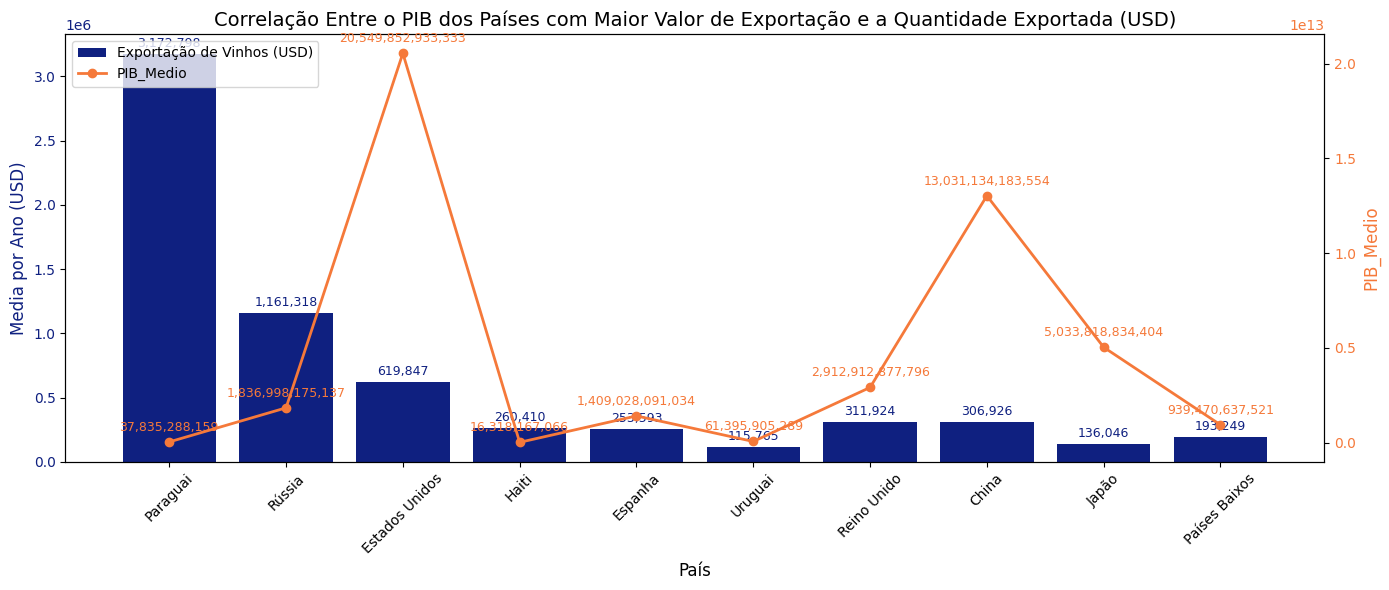

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras: Exportação
bars = ax1.bar(
    exportacao_PIB_pais['País'],
    exportacao_PIB_pais['Media por Ano (USD)'],
    color='#0F2080',
    label='Exportação de Vinhos (USD)'
)
ax1.set_xlabel('País', fontsize=12)
ax1.set_ylabel('Media por Ano (USD)', fontsize=12, color='#0F2080')
ax1.tick_params(axis='y', labelcolor='#0F2080')
ax1.set_title('Correlação Entre o PIB dos Países com Maior Valor de Exportação e a Quantidade Exportada (USD)', fontsize=14)
plt.xticks(rotation=45)

#Rótulos nas barras
for bar in bars:
    height = bar.get_height()
    ax1.annotate(
        f'{height:,.0f}',  # sem casas decimais, ajuste se quiser
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # desloca um pouco acima da barra
        textcoords='offset points',
        ha='center',
        fontsize=9,
        color='#0F2080'
    )

# Linha: PIB
ax2 = ax1.twinx()
line = ax2.plot(
    exportacao_PIB_pais['País'],
    exportacao_PIB_pais['PIB_Medio'],
    color='#F5793A',
    marker='o',
    linewidth=2,
    label='PIB_Medio'
)
ax2.set_ylabel('PIB_Medio', fontsize=12, color='#F5793A')
ax2.tick_params(axis='y', labelcolor='#F5793A')

# Rótulos nos pontos da linha
for x, y in zip(exportacao_PIB_pais['País'], exportacao_PIB_pais['PIB_Medio']):
    ax2.annotate(
        f'{y:,.0f}',  # sem casas decimais; ajuste se quiser
        xy=(x, y),
        xytext=(0, 8),
        textcoords='offset points',
        ha='center',
        fontsize=9,
        color='#F5793A'
    )

# Legenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


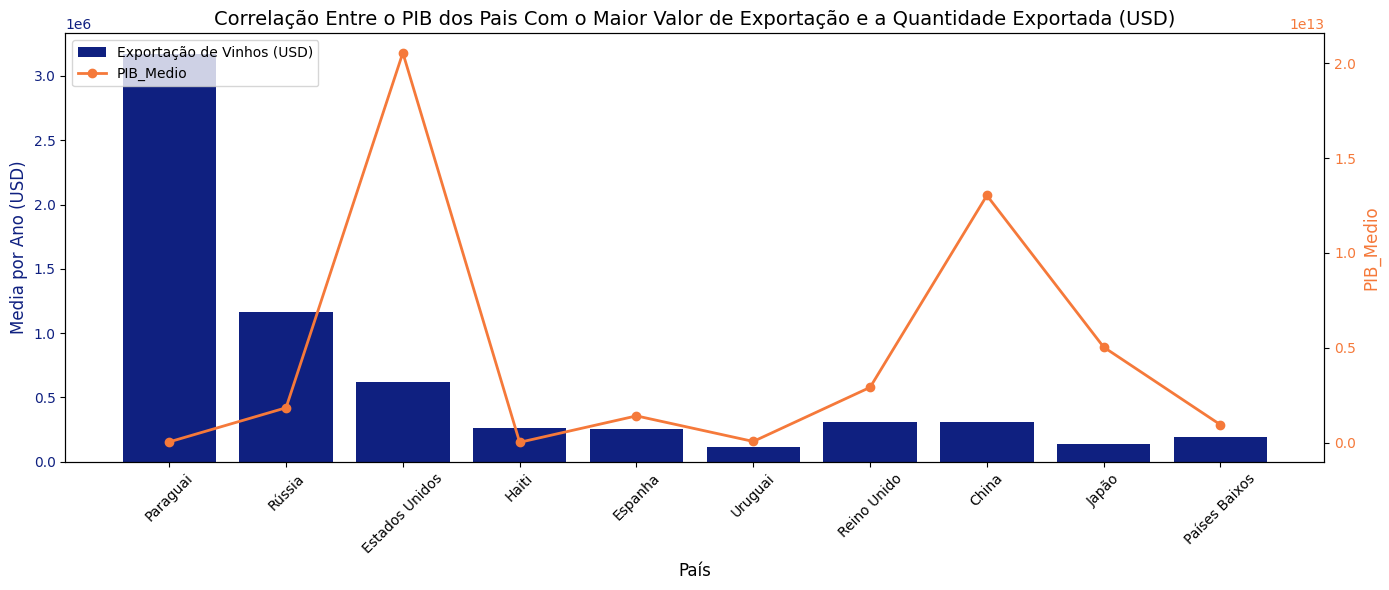

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras: Exportação
ax1.bar(
    exportacao_PIB_pais['País'],
    exportacao_PIB_pais['Media por Ano (USD)'],
    color='#0F2080',
    label='Exportação de Vinhos (USD)'
)
ax1.set_xlabel('País', fontsize=12)
ax1.set_ylabel('Media por Ano (USD)', fontsize=12, color='#0F2080')
ax1.tick_params(axis='y', labelcolor='#0F2080')
ax1.set_title('Correlação Entre o PIB dos Pais Com o Maior Valor de Exportação e a Quantidade Exportada (USD)', fontsize=14)
plt.xticks(rotation=45)

# Linha: PIB
ax2 = ax1.twinx()
ax2.plot(
    exportacao_PIB_pais['País'],
    exportacao_PIB_pais['PIB_Medio'],
    color='#F5793A',
    marker='o',
    linewidth=2,
    label='PIB_Medio'
)
ax2.set_ylabel('PIB_Medio', fontsize=12, color='#F5793A')
ax2.tick_params(axis='y', labelcolor='#F5793A')

# Legenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()